In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../artifacts/raw/data.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Multi-Classification

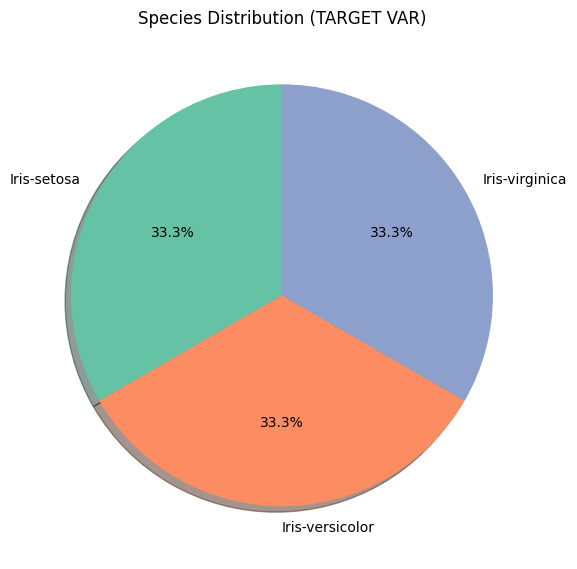

In [9]:
# Calculate percentage and plot
plt.figure(figsize=(4,4))
df.Species.value_counts(normalize=True).plot(
    kind='pie',
    autopct='%1.1f%%',           # Show percentage with one decimal
    colors=['#66c2a5', '#fc8d62', '#8da0cb'],  # color palette
    startangle=90,               
    shadow=True,                 
    figsize=(6, 6),              
    ylabel=''                    # Remove default label
)

plt.title('Species Distribution (TARGET VAR)')
plt.tight_layout()
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [10]:
df.drop("Id", axis=1, inplace=True)

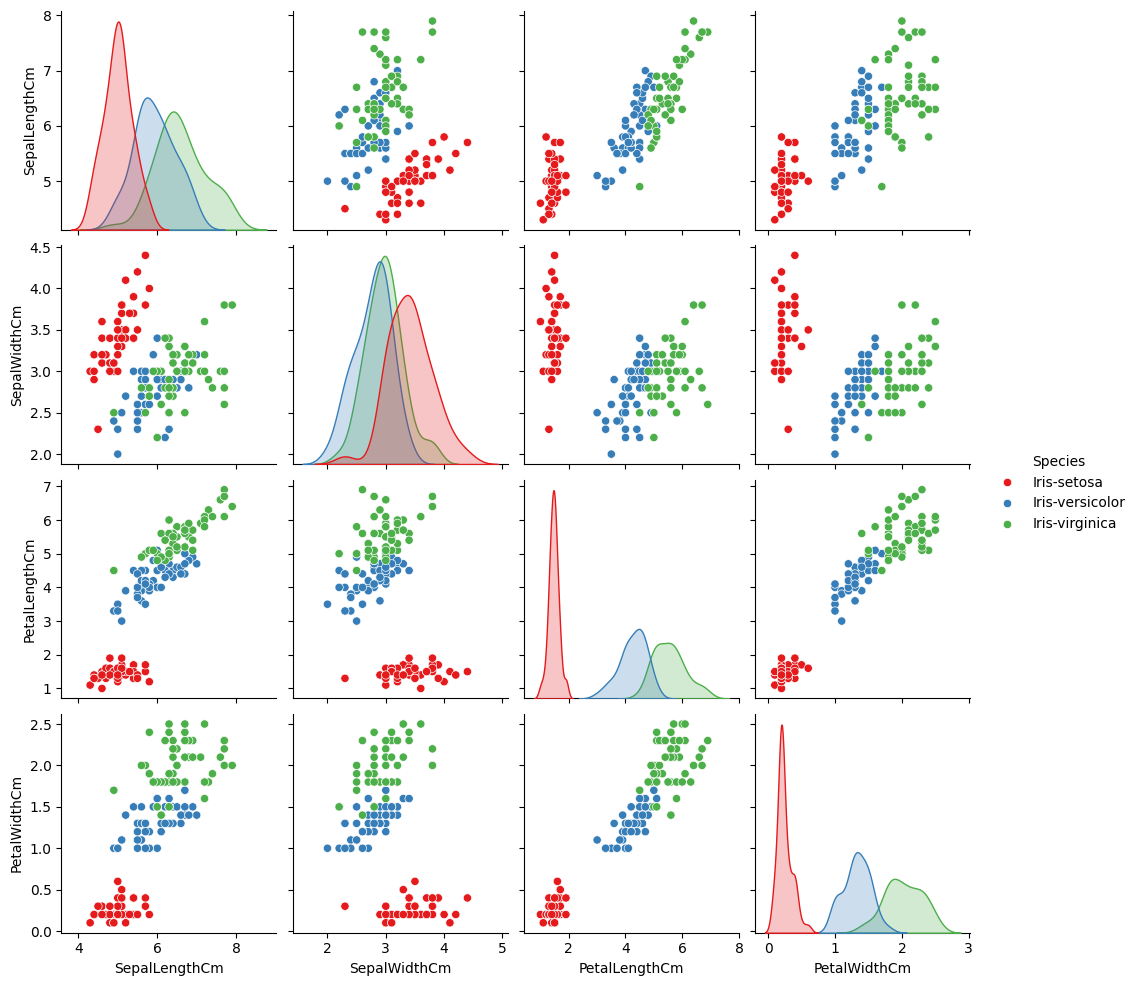

In [14]:
sns.pairplot(df,hue="Species", palette="Set1");

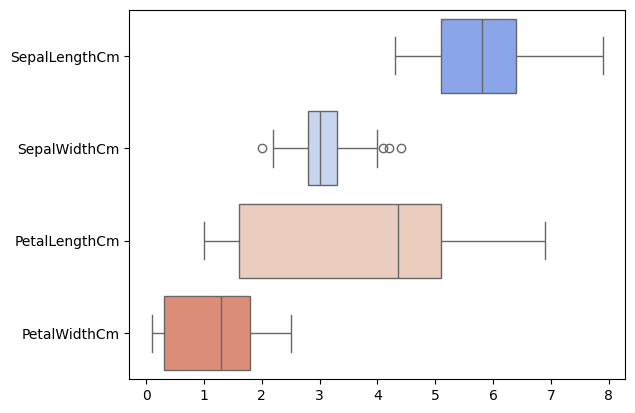

In [17]:
sns.boxplot(data=df, orient="h", palette="coolwarm");

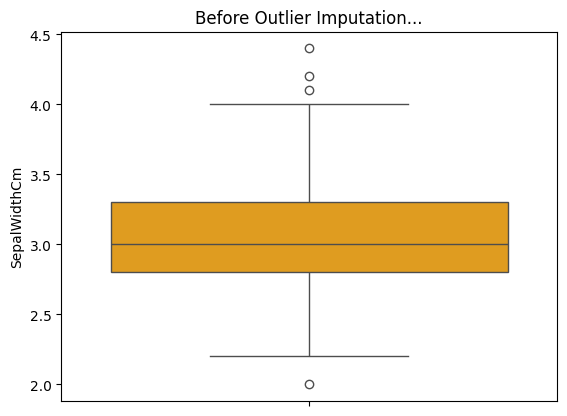

In [19]:
sns.boxplot(df["SepalWidthCm"], color="orange")
plt.title("Before Outlier Imputation...")
plt.show()

**Inter Quartile Range (IQR)**

In [20]:
Q1 = df['SepalWidthCm'].quantile(0.25)
Q3 = df["SepalWidthCm"].quantile(0.75)

IQR = Q3 - Q1

upper_value = Q3 + 1.5 * IQR
lower_value = Q1 - 1.5 * IQR

sepal_median  = np.median(df['SepalWidthCm'])

In [21]:
for i in df['SepalWidthCm']:
    if i > upper_value or i < lower_value:
        df['SepalWidthCm'] = df['SepalWidthCm'].replace(i,sepal_median)

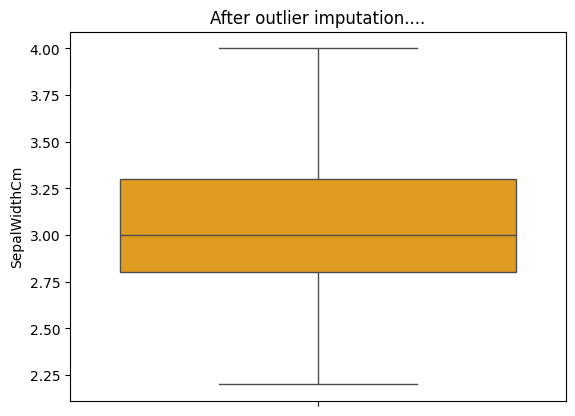

In [22]:
sns.boxplot(df['SepalWidthCm'], color="orange")
plt.title("After outlier imputation....")
plt.show()

**MODEL TRAINING USING DT**

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix

In [24]:

X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
Y = df["Species"]

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,Y , test_size=0.2 , random_state=42)

In [26]:
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=30,random_state=42)

In [27]:
tree_clf.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,30
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [28]:
y_pred = tree_clf.predict(X_test)

In [29]:
y_pred[:5]

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor'], dtype=object)

In [30]:
accuracy = accuracy_score(y_test,y_pred)

In [31]:
accuracy

1.0

In [32]:
conf_matrix = confusion_matrix(y_test,y_pred)

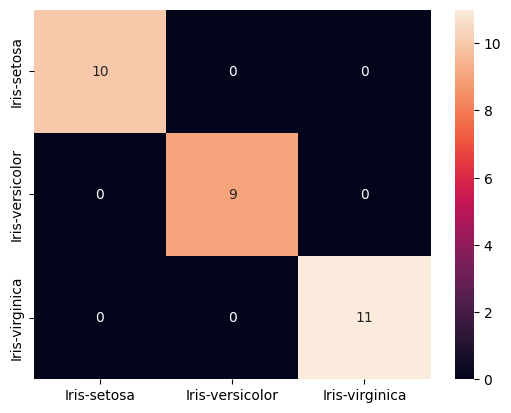

In [33]:
sns.heatmap(conf_matrix, annot=True, xticklabels=tree_clf.classes_,
            yticklabels=tree_clf.classes_);

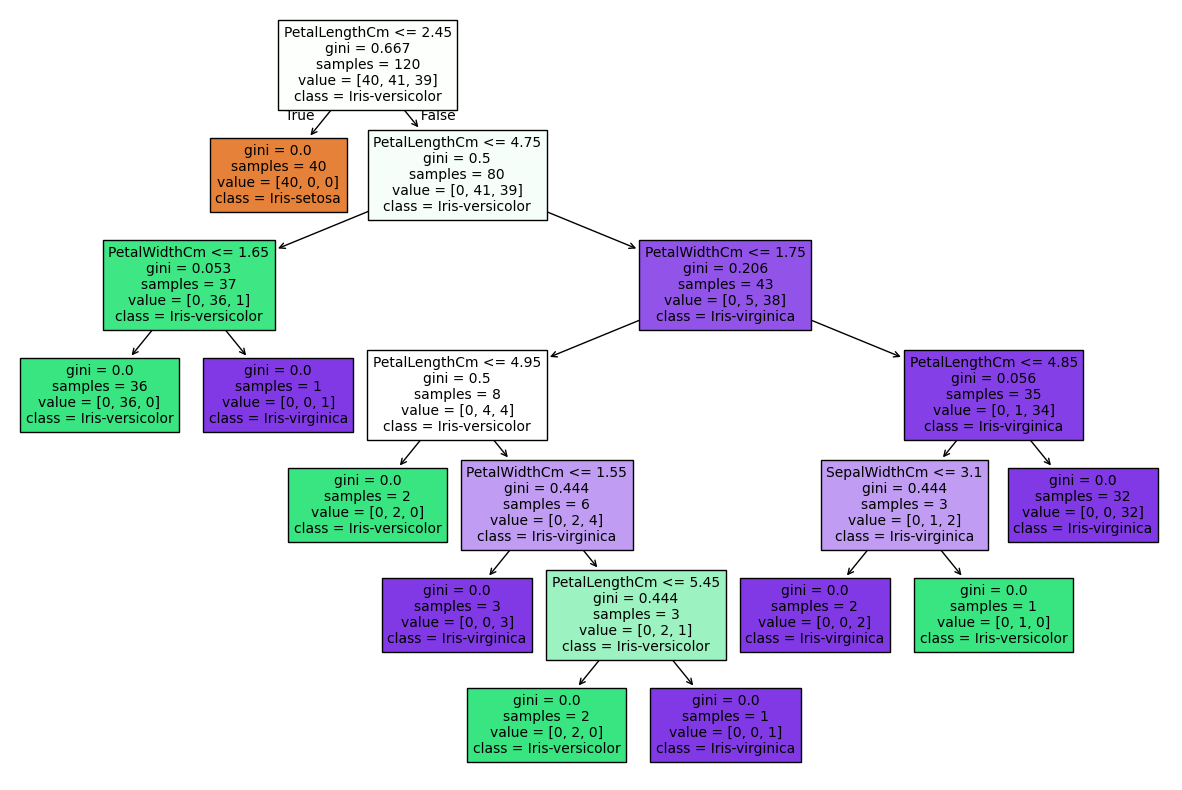

In [34]:
plt.figure(figsize=(15,10))
plot_tree(tree_clf, filled=True, feature_names=X.columns,
          class_names=tree_clf.classes_)
plt.show()

In [36]:
pd.DataFrame({"Features": X_train.columns,
              "Importances": tree_clf.feature_importances_})

,Features,Importances
0,SepalLengthCm,0.000000
1,SepalWidthCm,0.016670
2,PetalLengthCm,0.906143
3,PetalWidthCm,0.077186
